# 04. Custom Datasets

In [1]:
import requests # 웹에서 데이터 다운로드할 때 사용
import zipfile # .zip파일을 압축 해제하는데 사용
from pathlib import Path # 파일 경로를 객체 지향적으로 다루기 위한 Python 내장 클래스

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
    print(f"{image_path} directory exists.")
else :
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok = True)

# with 구문을 사용하면 파일 열기/닫기를 자동으로 처리. 코드 블럭이 끝나면 자동으로 f.close() 호출
with open(data_path / "pizza_steak_sushi.zip", "wb") as f: # open은 파일을 여는 것, 'wb'는 바이너리 쓰기 모두
    # requests.get 을 통해 해당 url에서 데이터 가져옴. request 객체에 다운로드한 파일의 데이터가 들어있음
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip") 
    print("Downloading...")
    f.write(request.content)

# zip파일을 읽기 모두 r로 열기, zip_ref가 열어놓은 zip 파일 객체
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    zip_ref.extractall(image_path)


Did not find data/pizza_steak_sushi directory, creating one...
Downloading...


In [4]:
import os

def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.


PIL 이용해서 이미지를 열 수 있다. 

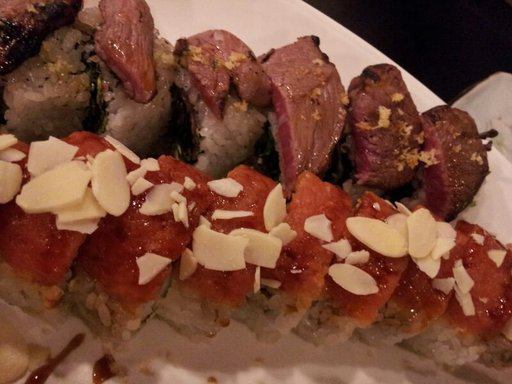

In [7]:
import random 
from PIL import Image

random.seed(42)
image_path_list = list(image_path.glob("*/*/*.jpg"))
random_image_path = random.choice(image_path_list)

img = Image.open(random_image_path)
img